## SVM e o classifier que divide os dots com uma linha (hiperplano) tentando minimizar o erro
## SVR e o regressor que tenta prever o valor (real) de um ponto

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Download Datasets: Udemy: https://www.superdatascience.com/machine-learning/
dataset=pd.read_csv("./../0. DataSets/Position_Salaries.csv")

dataset.round()
pd.options.display.float_format = '{:,.0f}'.format
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [13]:
X = dataset.iloc[:, 1:2].values   #apesar de so apanhar uma coluna, preferivel fazer assim para forcar o X a ser uma matrix e nao um vector
# y = dataset.iloc[:, 2].values
y = dataset.iloc[:, 2:3].values

y

#we left the "position" column out of the model because it doesn't give us any additional information than the "level" column could give us

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [5]:
### Feature scaling
#como tenho diferentes variaveis com diferentes magnitudes preciso de as normalizar
#necessario no SVM porque o methodo fit nao tem um feature scaler imbutido

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X = sc_X.fit_transform(X)

# y=y.reshape(1, -1)
y = sc_y.fit_transform(y)


/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
#Fitting SVR to the dataset
from sklearn.svm import SVR

#posso escolher varios kernels = tipos de regressor
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
#para fazer a previsao tenho que passar o que quero prever para um numpy array e uma matriz
#dps tenho que passar este valor para o scaler em X, faco finalmente a previsao e dps tenho que inverter o scaler em Y


y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([170370.02])

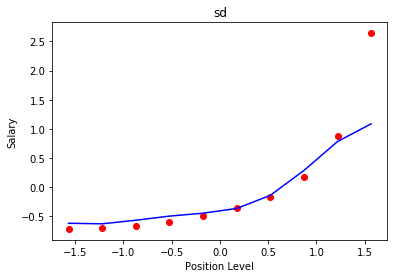

In [10]:
#visualising the SVR results
#considera o nivel 10 = CEO como um outlier, por isso e que a curva nao vai la
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("sd")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()